In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [84]:
fig = px.bar(df, x ='sudden weight loss', color ='Gender')
fig.show()

In [85]:
fig = px.histogram(df, x ='visual blurring', color ='Gender')
fig.show()

In [86]:
fig = px.pie(df, values ='visual blurring')
fig.show()

In [5]:
df = pd.read_csv('diabetes_data_upload.csv')

In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
Visual Blurring 


What is Visual Blurring -  A visual symptom that makes it difficult to see clearly or sharply


How does this symptom relate to diabetes -  If your blood sugar levels change quickly from low to normal, the shape of your eye's lens' can be affected, and your vision can be blurred.


What is the effect - Blurry or wavy vision in the center of your field of vision

SyntaxError: invalid syntax (3535386915.py, line 1)

In [8]:
df['Age'].isnull().values.any()

False

In [9]:
results = []
for col in df.columns:
    missing_or_not = df[col].isnull().values.any()
    print(col + ' ' + str(missing_or_not))

Age False
Gender False
Polyuria False
Polydipsia False
sudden weight loss False
weakness False
Polyphagia False
Genital thrush False
visual blurring False
Itching False
Irritability False
delayed healing False
partial paresis False
muscle stiffness False
Alopecia False
Obesity False
class False


In [10]:
def Change_to_Value (Input):
    if Input == 'Yes':
        return 1
    else:
        return 0

In [11]:
Change_to_Value('No')

0

In [12]:
def convert(x):
    if x == 'Yes' or x == 'Male' or x == 'Positive':
        return 1
    else:
        return 0


In [13]:
convert('Male')

1

In [14]:
df['Gender'].apply(convert)

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    1
Name: Gender, Length: 520, dtype: int64

In [15]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
515    Female
516    Female
517    Female
518    Female
519      Male
Name: Gender, Length: 520, dtype: object

In [16]:
for col in df.columns:
    if col != 'Age':
        df[col] = df[col].apply(convert)

In [17]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [18]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [19]:
X.corrwith(Y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

In [20]:
corr = df.corr()

In [21]:
corr = df.corr()
corr['class']

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
Name: class, dtype: float64

In [22]:
corr = df.corr()
fig = px.imshow(corr, aspect="auto", color_continuous_scale='bupu', text_auto = True)
fig.show()




In [23]:
corr_data = X.corrwith(Y).to_frame().reset_index()
fig = px.bar(corr_data, x='index', y=0, title="Correlation between Features and Having Diabetes")
fig.show()


In [56]:
X = df.drop(['class', 'Age', 'weakness', 'Genital thrush', 'Itching', 'delayed healing', 'muscle stiffness', 'Obesity'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)





In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)



In [58]:
# Logistic Regression

In [59]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [60]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [61]:
y_hat = clf.predict(x_test)
y_hat

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [62]:
#Compute your MSE.
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.45384615384615384


<AxesSubplot:>

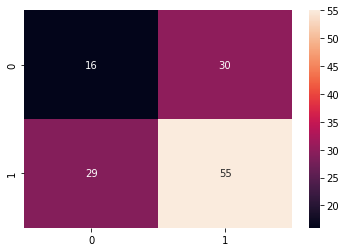

In [63]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [99]:
#precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.26086957, 0.79761905])

In [106]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

79

In [110]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.4137931 , 0.66336634])

In [64]:
# svm linear

In [65]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [66]:
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [67]:
y_hat = clf.predict(x_test)
y_hat

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [68]:
#Compute your MSE.
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.4307692307692308


<AxesSubplot:>

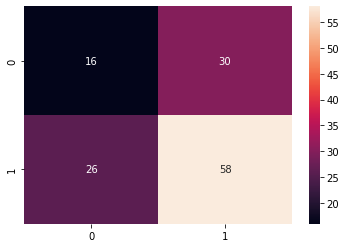

In [70]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [100]:
# precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.26086957, 0.79761905])

In [105]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

79

In [109]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.4137931 , 0.66336634])

In [71]:
#KNN

In [72]:
import sklearn #our favorite machine learning library
from sklearn.neighbors import KNeighborsClassifier as KNN #this will import our model as KNN

In [73]:
# Creating the KNN model object -- we need to tell it the number of neighbors to look at.
k = 7 #number of neighbors to look at (look at 7 nearest neighbors)
my_KNN_model = KNN(n_neighbors=k)

In [74]:
my_KNN_model.fit(x_train, y_train) #train the model on our past results x_train (inputs) and y_train (outputs)

KNeighborsClassifier(n_neighbors=7)

In [75]:
y_hat = my_KNN_model.predict(x_test)

In [76]:
y_hat

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
np.array(y_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [78]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)


0.3923076923076923


<AxesSubplot:>

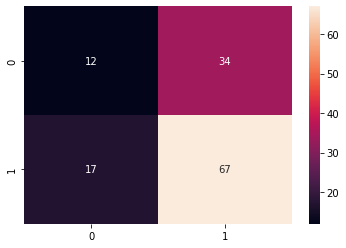

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [101]:
# precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.26086957, 0.79761905])

In [104]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

79

In [108]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.4137931 , 0.66336634])

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [81]:
#RBF

<AxesSubplot:>

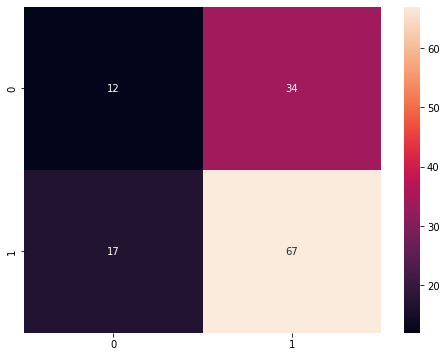

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [102]:
# precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.26086957, 0.79761905])

In [103]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

79

In [107]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.4137931 , 0.66336634])

In [83]:
#Logistic regression
#svmrbf and svm linear
#knn
#naive bayes
#Decision trees
#Random forest

precision, accuracy, recall

In [241]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train, y_test = train_test_split(X, Y)


In [242]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(390, 9)
(130, 9)
(390,)
(130,)


In [243]:
x_test.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia
299,0,1,1,1,1,1,0,1,0
53,0,0,1,1,0,1,0,0,0
433,1,0,1,0,0,0,0,0,1
179,0,1,1,1,1,0,0,1,0
243,1,0,0,0,0,0,0,0,0


In [244]:
 y_train.head()

104    1
50     1
375    0
356    0
296    1
Name: class, dtype: int64

In [245]:
y_test.head

<bound method NDFrame.head of 299    1
53     1
433    1
179    1
243    0
      ..
144    1
271    1
423    1
84     1
327    0
Name: class, Length: 130, dtype: int64>

In [0]:
#KNN

In [180]:
import sklearn #our favorite machine learning library
from sklearn.neighbors import KNeighborsClassifier as KNN #this will import our model as KNN
from sklearn.model_selection import GridSearchCV

In [181]:
# Creating the KNN model object -- we need to tell it the number of neighbors to look at.
k = 7 #number of neighbors to look at (look at 7 nearest neighbors)
parameters = {'n_neighbors':[3, 5, 7], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree')}
my_KNN_model = KNN()

In [182]:
clf = GridSearchCV(my_KNN_model, parameters)

In [183]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree'),
                         'n_neighbors': [3, 5, 7],
                         'weights': ('uniform', 'distance')})

In [184]:
clf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}

In [185]:
clf.best_score_

0.5538461538461539

In [186]:
pred = clf.predict(x_test)

In [187]:
(pred == y_test).mean()

0.5307692307692308

In [188]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)


0.3923076923076923


<AxesSubplot:>

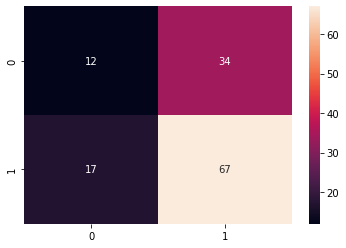

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [279]:
#SVM linear

In [285]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [289]:
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
parameters = {'loss':['hinge','squared_hinge'], 'dual':['True']}
my_svm_model = LinearSVC()


In [290]:
clf = GridSearchCV(my_svm_model, parameters)

In [291]:
clf.fit(x_train, y_train)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 1204, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 1043, in _get_liblinear_solver_type
    raise ValueError(
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=True, Parameters: penalty='l2', loss='hinge', dual='True'

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 1204, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 1043, in _get_liblinear_solver_type
    raise ValueError(
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l2', loss='squared_hinge', dual='True'


In [0]:
clf.best_params_

In [0]:
clf.best_score_

In [0]:
(make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))

In [0]:
, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)